In [2]:
import platform #os 정보를 가져 올 수 있는 모듈

from matplotlib import font_manager, rc # font_manager : 폰트 관리 모듈, rc : 폰트 변경 모듈
from matplotlib import pyplot as plt # 시각화 도구

import seaborn as sns

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False # 유니코드 표현 설정하기


if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # OS가 APPLE(Darwin)이면 AppleGothic으로 폰트 설정
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf" #OS가 윈도우즈면 맑은 고딕으로 설정
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System... sorry~~~~')

In [3]:
import pandas as pd

In [4]:
crime_anal_norm = pd.read_csv('./data/crime_anal_norm_final.csv',index_col='구별',encoding='utf-8')
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


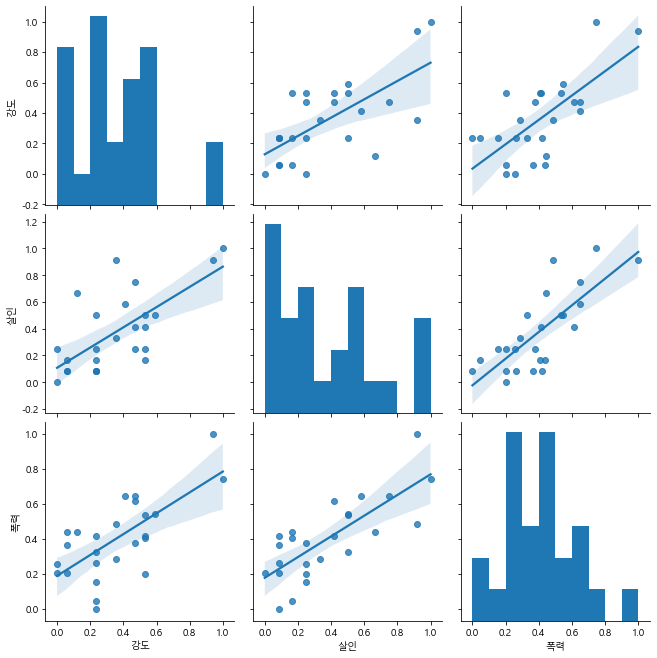

In [7]:
sns.pairplot(crime_anal_norm,vars=['강도','살인','폭력'],kind='reg',size=3)
# vars는 데이터프레임의 컬럼 이름을 넣어주면 됨
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


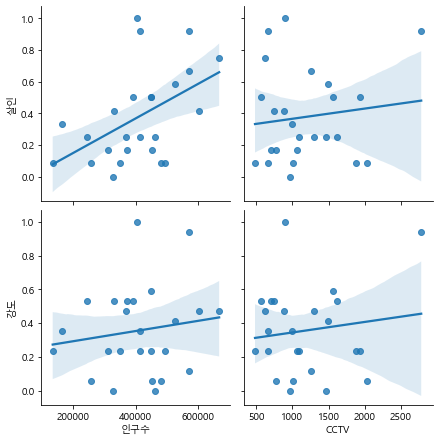

In [8]:
sns.pairplot(crime_anal_norm,x_vars=['인구수','CCTV'],y_vars=['살인','강도'],kind='reg',size=3)
plt.show()

인구수가 증가하면 강도가 많이 늘진 않지만 살인은 많이 늘어난다. 
-> 이 그래프가 신뢰성 있는 증거라고 믿긴 힘들다. 구가 25개 밖에 되지 않음. CCTV의 경우 없어서 높은 구와 많아도 높은 구 두 종류가 모두 존재한다. 

데이터가 많이 없으므로 우리가 알아야 하는 인사이트는 -> CCTV가 많아진다고해서 범죄가 극단적으로 줄어드는 것은 아니다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


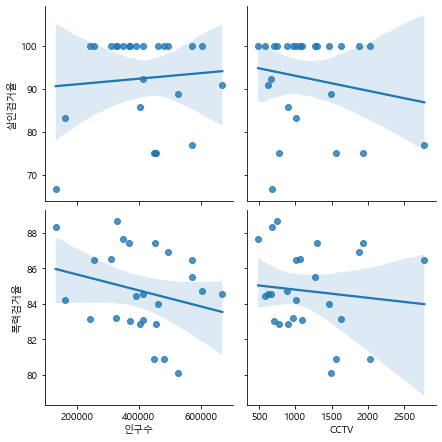

In [9]:
sns.pairplot(crime_anal_norm,x_vars=['인구수','CCTV'],y_vars=['살인검거율','폭력검거율'],kind='reg',size=3)
plt.show()

CCTV가 늘어나면 음의 상관관계가 있는 것을 볼 수 있다.
이는 CCTV가 적절하지 못한 위치에 있다거나, 최대한 CCTV가 없는 상황에서 폭력이 이루어짐을 알 수 있다.

* cf: 100%에서 쭉 위에 있는건 우리가 처음에 100%가 넘는 데이터를 모두 100%으로 바꾸어주었기 때문

## 히트맵으로 검거율 및 범죄 확인하기
* 검거의 총합으로 정렬
* 범죄의 총합으로 정렬

In [10]:
tmp_max = crime_anal_norm['검거'].max() # 제일 높은 검거값 가져오기
crime_anal_norm['검거'] = crime_anal_norm['검거']/tmp_max*100
# 검거의 최댓값은 100으로 설정되고, 나머지는 그에 알맞는 비율로 설정
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,85.463066
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,85.550226
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,94.070728
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,96.572809
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,85.212224


In [11]:
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거',ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.666924,97.997139
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,603772.0,884,2.333944,96.572809
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.204979,96.375820
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.633921,95.444250


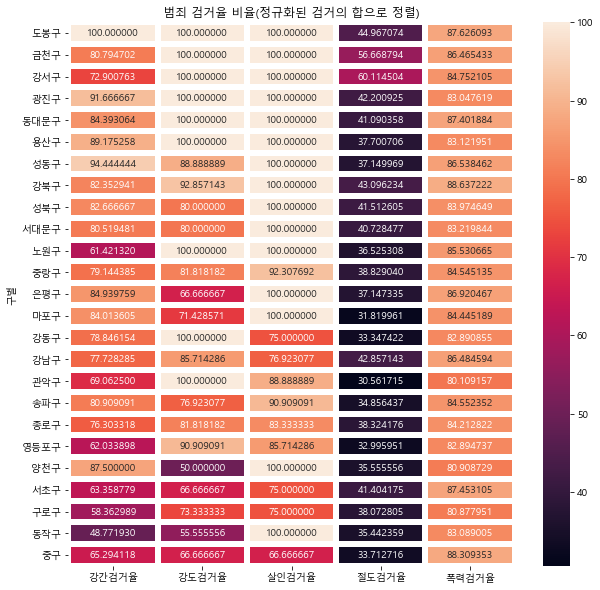

In [12]:
target_cols = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

plt.figure(figsize=(10,10))

sns.heatmap(crime_anal_norm_sort[target_cols], annot=True,fmt='f',linewidths=5)
plt.title("범죄 검거율 비율(정규화된 검거의 합으로 정렬)")
plt.show()

밑으로 내려갈수록 중범죄에 취약한 동네임을 알 수 있다.
(중범죄 검거율이 낮은 동네 - 양천구, 서초구, 구로구, 동작구, 중구....)

### 범죄 히트맵 확인하기

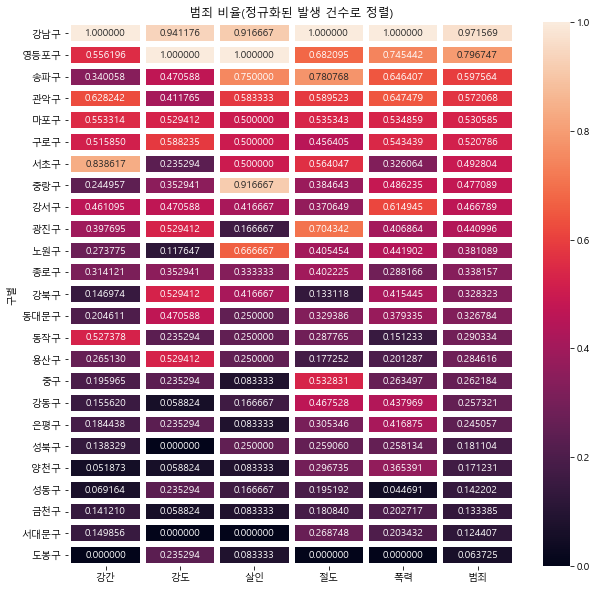

In [13]:
target_col = ['강간','강도','살인','절도','폭력','범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄']/5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄',ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col],annot=True,fmt='f',linewidths=5)
plt.title("범죄 비율(정규화된 발생 건수로 정렬)")
plt.show()